In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

from astropy.coordinates import SkyCoord
import astropy.units as u

In [10]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'
orig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'

## Getting the Data

In [11]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full-rem-seps.csv', index_col = 0)
df_cat

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,860686,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,1.571297e-06,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-2.881107e-06,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,4000705540034,1304538,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-6.036952e-06,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,4000705540064,1310001,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-1.023530e-05,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,4001204758614_extra,1520733,stage4,149.891374,2.866981,28107.876953,37826.437500,0.000086,0.000104,-9.313976e-07,...,-9.441206,-9.279022,-9.095134,-9.003501,-8.955496,0.120441,0.213251,0.306832,0.556012,0.731876
4177,4546055995_extra,1520749,stage2,150.383110,2.865367,16320.103516,37787.917969,0.000131,0.000236,7.123858e-05,...,-9.857880,-9.658215,-9.485625,-9.235816,-8.971795,0.162147,0.238640,0.432004,0.592193,0.687256
4178,4000927318133_extra,1523385,stage3,149.789910,2.865132,30540.179688,37782.648438,0.000045,0.000059,1.600747e-05,...,-9.525900,-9.472779,-9.353454,-9.273221,-9.213521,0.262676,0.355466,0.410356,0.489105,0.566003
4179,4000747939904_extra,1524909,stage3,150.450581,2.872371,14702.710938,37956.468750,0.000248,0.000292,7.378556e-06,...,-9.556987,-9.385500,-9.154130,-9.026810,-8.938077,0.153294,0.283249,0.436332,0.600615,0.693621


In [12]:
df_cat.query('ORyanID_23 == 4000904738555')

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975


In [13]:
or_sample = pd.read_csv(f'{orig_folder}/interacting-catalogue.csv', index_col = 0)
or_sample.head()

,SourceID,RA,Dec,int_prediction,references,status
0,4000704963129,187.983807,58.010524,0.958096,No_entry,Unreferenced
1,4000704963271,187.980323,58.026481,0.966350,No_entry,Unreferenced
2,4000704963422,187.938181,58.039949,0.956150,No_entry,Unreferenced
3,4000705131622,217.216271,34.015278,0.987888,No_entry,Unreferenced
4,4000705131630,217.207839,34.015576,0.984174,No_entry,Unreferenced


## Conductiong Matching

In [14]:
df_cat_red = df_cat[['ORyanID_23','ID','ALPHA_J2000','DELTA_J2000']].rename(columns = {'ORyanID_23' : 'SourceID'})

In [15]:
df_merge = df_cat_red.merge(or_sample[['SourceID', 'RA', 'Dec']], on = 'SourceID', how = 'left').dropna()
df_merge.head()

,SourceID,ID,ALPHA_J2000,DELTA_J2000,RA,Dec
0,4000705532455,816891,150.679846,2.196543,150.679664,2.196615
1,4000705533383,860686,150.644522,2.237226,150.645125,2.237650
2,4000705539941,1301188,149.702462,2.654895,149.702652,2.654624
3,4000705540034,1304538,149.726828,2.658172,149.727017,2.658066
4,4000705540064,1310001,149.701230,2.660343,149.701495,2.660271


In [16]:
len(df_merge)

3072

In [17]:
df_merge.drop_duplicates('SourceID', keep = 'first')

,SourceID,ID,ALPHA_J2000,DELTA_J2000,RA,Dec
0,4000705532455,816891,150.679846,2.196543,150.679664,2.196615
1,4000705533383,860686,150.644522,2.237226,150.645125,2.237650
2,4000705539941,1301188,149.702462,2.654895,149.702652,2.654624
3,4000705540034,1304538,149.726828,2.658172,149.727017,2.658066
4,4000705540064,1310001,149.701230,2.660343,149.701495,2.660271
...,...,...,...,...,...,...
2497,4001111524196,991056,150.407247,2.356121,150.406927,2.355820
2498,4001185627710,1294479,149.998094,2.651083,149.997831,2.651329
2499,6000508613553,1140076,150.610964,2.494102,150.610729,2.494162
2500,6000518662663,575198,150.421018,1.984436,150.421572,1.985231


In [18]:
def calc_sep(cosmos_ra, cosmos_dec, ra, dec):
    coord_cosmos = SkyCoord(ra = cosmos_ra * u.deg, dec = cosmos_dec * u.deg, frame = 'fk5')
    coord = SkyCoord(ra = ra * u.deg, dec = dec * u.deg, frame = 'fk5')
    
    sep = coord_cosmos.separation(coord).to(u.arcsec)
    
    return sep.value

In [19]:
df_seps = (
    df_merge
    .assign(
        sep = df_merge.progress_apply(lambda row: calc_sep(row.ALPHA_J2000, row.DELTA_J2000, row.RA, row.Dec), axis = 1)
    )
)

100%|██████████| 3072/3072 [00:07<00:00, 411.23it/s]


In [20]:
df_seps_dedup = df_seps.sort_values('sep', ascending=True).drop_duplicates('SourceID', keep='first')

In [21]:
df_seps_dedup

,SourceID,ID,ALPHA_J2000,DELTA_J2000,RA,Dec,sep
2405,4580410536,1080495,150.763145,2.438791,150.763146,2.438788,0.010785
2185,4001011054547,963856,150.313016,2.329296,150.313012,2.329298,0.015715
1841,4001278172170,378693,150.761285,1.783725,150.761279,1.783726,0.021461
1537,4537801039,878003,149.669074,2.251408,149.669074,2.251401,0.024119
2434,6000445564012,718139,149.976821,2.107648,149.976829,2.107646,0.030095
...,...,...,...,...,...,...,...
1754,4000830668768,1229007,150.529378,2.581113,150.528407,2.579876,5.659015
1864,4001279691500,1205299,150.189705,2.561028,150.190749,2.562212,5.681059
1865,6000294707485,555851,150.342631,1.953320,150.344628,1.953979,7.567058
2805,4000846764532,1160008,150.396982,2.517297,150.396398,2.515145,8.026051


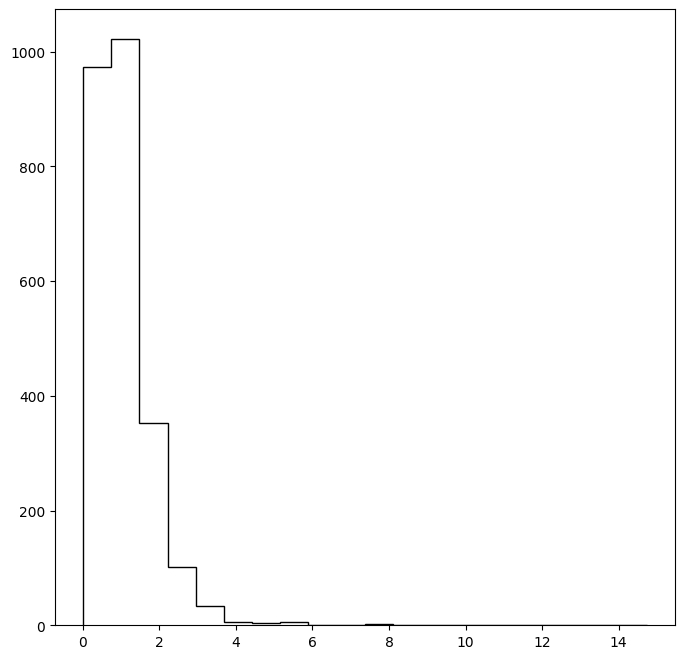

In [22]:
plt.figure(figsize = (8,8))
plt.hist(df_seps_dedup.sep, bins = 20, histtype = 'step', color = 'black')
plt.show()

## Checking Large Separations

In [23]:
df_vis_clsf = (
    pd.read_csv(f'{data_folder}/secondaries-identified.csv', index_col = 0)
    .reset_index()
    .rename(columns = {'index' : 'SourceID', '0' : 'vis_clsf'})
)
df_vis_clsf.head()

,SourceID,vis_clsf
0,4000705532455,n
1,4000705532984,nm
2,4000705533312,y
3,4000705533383,n
4,4000705539435,l


In [24]:
len(df_seps)

3072

In [25]:
df_seps_clsf = df_seps_dedup.merge(df_vis_clsf, on = 'SourceID', how = 'left')

In [26]:
df_rem = df_seps_clsf.query('sep > 3.5')
len(df_rem)

19

In [27]:
df_seps_clsf.vis_clsf.value_counts()

n    1752
y     636
b     113
m       1
Name: vis_clsf, dtype: int64

In [28]:
res = ['n','y','b']
color = ['black','blue','red']

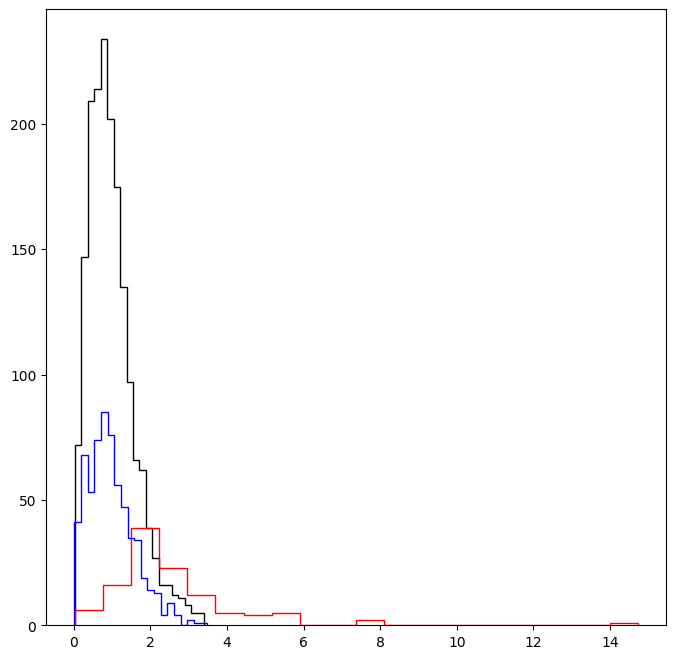

In [29]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,8))
for counter, i in enumerate(res):
    df_tmp = df_seps_clsf.query('vis_clsf == @i')
    ax.hist(df_tmp.sep, bins = 20, histtype = 'step', color = color[counter])
plt.show()

In [30]:
df_rem

,SourceID,ID,ALPHA_J2000,DELTA_J2000,RA,Dec,sep,vis_clsf
2483,4000914376885,484497,149.911188,1.885398,149.910420,1.884747,3.624873,b
2484,4651333659,714303,149.817268,2.103133,149.816838,2.104049,3.640202,b
2485,4000992057030,1267426,149.901726,2.620093,149.901785,2.619035,3.814999,b
2486,4000708110752,958323,150.119051,2.324495,150.119123,2.325579,3.911912,b
2487,6000354149920,1141908,149.921410,2.502664,149.922427,2.502206,4.014112,b
2488,4000956352246,290273,149.721171,1.692336,149.720818,1.691268,4.048404,b
2489,4000749509721,977735,149.881193,2.341328,149.881276,2.340164,4.199905,b
2490,4001237100214,1173112,150.259089,2.528087,150.260122,2.528766,4.446823,b
2491,4001074024690,787134,149.883487,2.171807,149.884593,2.171221,4.506467,b
2492,4000940892426,996859,150.558513,2.362166,150.559454,2.361285,4.637280,b
